<a href="https://colab.research.google.com/github/GhanshyamRegar/neural-newtwork-classifier/blob/main/neural_network_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.3944
Epoch 100, Loss: 0.0729
Epoch 200, Loss: 0.0312
Epoch 300, Loss: 0.0178
Epoch 400, Loss: 0.0120
Epoch 500, Loss: 0.0088
Epoch 600, Loss: 0.0069
Epoch 700, Loss: 0.0056
Epoch 800, Loss: 0.0047
Epoch 900, Loss: 0.0040


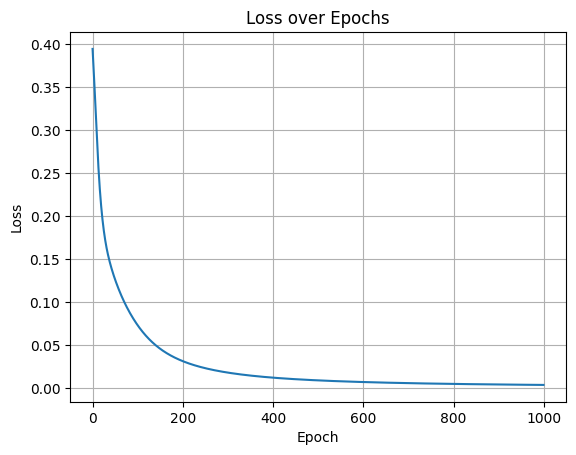

Expected: A, Predicted: A


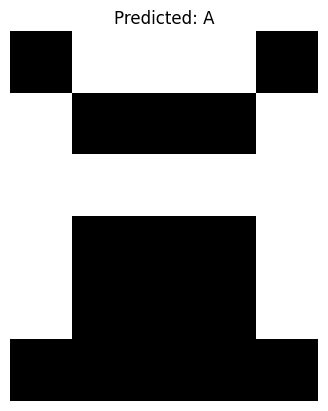

Expected: B, Predicted: B


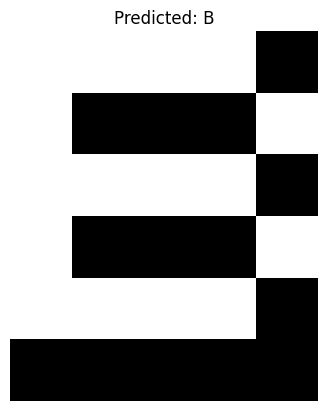

Expected: C, Predicted: C


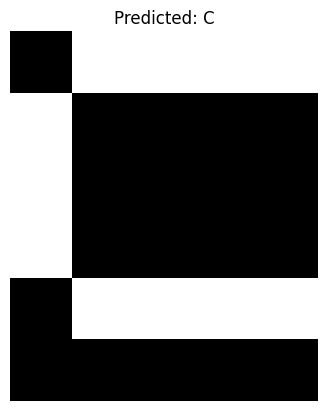

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    0,1,1,1,0,
    1,0,0,0,1,
    1,1,1,1,1,
    1,0,0,0,1,
    1,0,0,0,1,
    0,0,0,0,0
])

B = np.array([
    1,1,1,1,0,
    1,0,0,0,1,
    1,1,1,1,0,
    1,0,0,0,1,
    1,1,1,1,0,
    0,0,0,0,0
])

C = np.array([
    0,1,1,1,1,
    1,0,0,0,0,
    1,0,0,0,0,
    1,0,0,0,0,
    0,1,1,1,1,
    0,0,0,0,0
])

X = np.array([A, B, C])
y = np.array([0, 1, 2])

def one_hot(y, num_classes=3):
    one_hot_encoded = np.zeros((len(y), num_classes))
    one_hot_encoded[np.arange(len(y)), y] = 1
    return one_hot_encoded

y_encoded = one_hot(y)

X = X / 1.0

input_size = 30
hidden_size = 10
output_size = 3
epochs = 1000
lr = 0.1


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

loss_history = []

for epoch in range(epochs):

    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    loss = np.mean((y_encoded - a2) ** 2)
    loss_history.append(loss)

    error_output = y_encoded - a2
    d_output = error_output * sigmoid_derivative(a2)

    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)

    W2 += a1.T.dot(d_output) * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr
    W1 += X.T.dot(d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

plt.plot(loss_history)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


def predict(img):
    a1 = sigmoid(np.dot(img, W1) + b1)
    a2 = sigmoid(np.dot(a1, W2) + b2)
    return np.argmax(a2)

labels = ['A', 'B', 'C']

for i, img in enumerate(X):
    prediction = predict(img)
    print(f"Expected: {labels[y[i]]}, Predicted: {labels[prediction]}")
    plt.imshow(img.reshape(6, 5), cmap='gray')
    plt.title(f"Predicted: {labels[prediction]}")
    plt.axis('off')
    plt.show()
